# Inference

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from predictor import NUCLEIdemo
from predictor_coco import COCODemo
from PIL import Image
import numpy as np
from maskrcnn_benchmark.config import cfg
import random
import os
from maskrcnn_benchmark.modeling.detector.generalized_rcnn import GeneralizedRCNN
import torch
from maskrcnn_benchmark.config.paths_catalog import DatasetCatalog

In [9]:
# increasing the size of figures
pylab.rcParams['figure.figsize'] = 20, 12

#CONFIGS = '/home/max/github/maskrcnn-benchmark/configs/'
CONFIGS = '/home/maxsen/git/ms2/code/configs/'
#CONFIGS = '/home/max/github/ms2/code/configs/'

In [10]:
# load config file

config_file = CONFIGS + 'nuclei_1gpu_nonorm_offline.yaml'
cfg.merge_from_file(config_file)
cfg.merge_from_list(['MODEL.DEVICE', 'cpu'])
cfg.merge_from_list(['PATHS_CATALOG', './paths_catalog.py'])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
# if new, it may have to be set in paths_catalog.py
#cfg.merge_from_list(['MODEL.WEIGHT', 'catalog://Own_trained/coco_original'])
cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/data/models/model_final.pth'])
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])
print(cfg)


DATALOADER:
  ASPECT_RATIO_GROUPING: False
  NUM_WORKERS: 4
  SIZE_DIVISIBILITY: 32
DATASETS:
  TEST: ('coco_complete_popped_test',)
  TRAIN: ('coco_offline_augmented_train', 'coco_offline_augmented_val')
INPUT:
  HEIGHT_IS_WIDTH: False
  MAX_SIZE_TEST: 2049
  MAX_SIZE_TRAIN: 1025
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (1024,)
  PIXEL_MEAN: [0.0, 0.0, 0.0]
  PIXEL_STD: [1.0, 1.0, 1.0]
  TO_BGR255: True
MODEL:
  BACKBONE:
    CONV_BODY: R-50-FPN
    FREEZE_CONV_BODY_AT: 2
    USE_GN: False
  CLS_AGNOSTIC_BBOX_REG: False
  DEVICE: cpu
  FBNET:
    ARCH: default
    ARCH_DEF: 
    BN_TYPE: bn
    DET_HEAD_BLOCKS: []
    DET_HEAD_LAST_SCALE: 1.0
    DET_HEAD_STRIDE: 0
    DW_CONV_SKIP_BN: True
    DW_CONV_SKIP_RELU: True
    KPTS_HEAD_BLOCKS: []
    KPTS_HEAD_LAST_SCALE: 0.0
    KPTS_HEAD_STRIDE: 0
    MASK_HEAD_BLOCKS: []
    MASK_HEAD_LAST_SCALE: 0.0
    MASK_HEAD_STRIDE: 0
    RPN_BN_TYPE: 
    RPN_HEAD_BLOCKS: 0
    SCALE_FACTOR: 1.0
    WIDTH_DIVISOR: 1
  FPN:
    USE_GN: False
    US

In [11]:
# set the model loader, for nuclei do NUCLEIdemo
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size = 1024,
    confidence_threshold=0.4,
    show_mask_heatmaps = False
)


In [12]:
def load(path):

    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()

def save_image(img, save_name):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.savefig(save_name, bbox_inches = 'tight')
    print('Saved under {}.'.format(save_name))
    

/home/maxsen/DEEPL/data/training_data/Nuclei-Test_used_for_test/20181107_182739_066_Seq0004_11.png
(2048, 2048, 3)


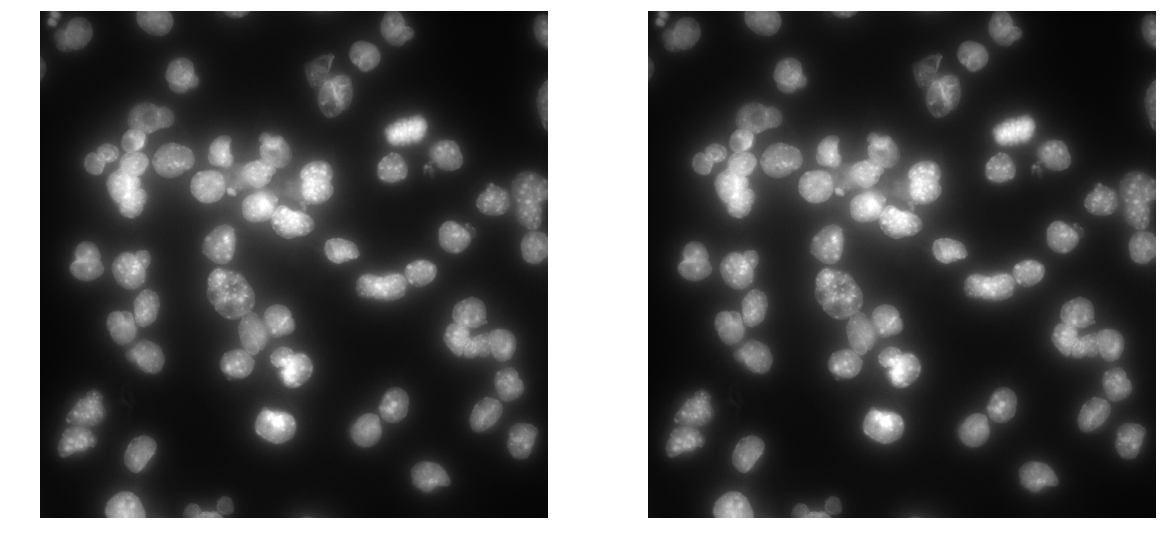

In [15]:
#img_path = "/data/proj/smFISH/Students/Max_Senftleben/files/data/20190306_raw_and_all/train/"
img_path = '/home/maxsen/DEEPL/data/training_data/Nuclei-Test_used_for_test/'
#img_path = '/home/maxsen/DEEPL/data/nuclei_20190205_data/all/'
#img_path = '/home/maxsen/DEEPL/data/val2017/'

# 1024x1024
#img_path = '/home/maxsen/git/master_thesis/data/data/val/'
#img_path = '/home/maxsen/DEEPL/data/training_data/Nuclei-Test_used_for_test/'


random_img = random.choice(os.listdir(img_path))
print(img_path + random_img)
image = load(img_path + random_img)
print(image.shape)
imshow(image, image)


scores_____ [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999992847442627, 0.9999992847442627, 0.999998927116394, 0.9999980926513672, 0.9999972581863403, 0.9999767541885376, 0.9997814297676086, 0.9985456466674805, 0.9524937868118286, 0.5207515358924866, 0.42227280139923096]
labels_____ [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


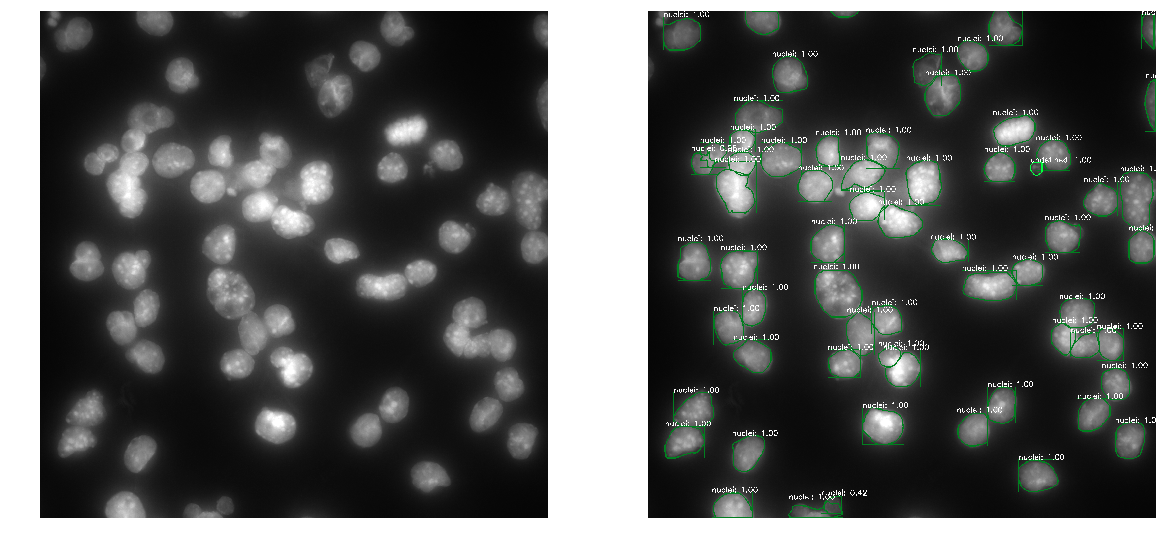

In [16]:
results, predictions = nuclei_detect.run_on_opencv_image(image)
save_path = '/home/max/github/nuclei_cell_detect/new_images/'

#print(results)
#imshow(image,results, save_path = '/home/max/github/nuclei_cell_detect/new_images/' + random_img[:-4] + '_pred.png')
imshow(image,results)


In [64]:
print(predictions.fields())
predictions["scores"]

['scores', 'labels', 'mask']


IndexError: too many indices for tensor of dimension 2